In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Preprocessing

In [2]:
# load data
data_folder = Path("./data/Hybrid_final/")

data = {}

for gesture_file in data_folder.glob("*.csv"):
    gesture_name = gesture_file.stem
    data[gesture_name] = pd.read_csv(gesture_file)

# gesture classes
print(data.keys())

dict_keys(['c', 'u', 'b', 'f', 'r', 'e', 'o', 'x', 'l'])


In [3]:
# look at data from one gesture
data["o"]

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,timestamp
0,-0.00025,0.00050,0.25200,0.000275,-0.000320,0.000275,1.741885e+09
1,-0.00050,-0.00025,0.25225,0.000320,-0.000382,0.000351,1.741885e+09
2,-0.00100,-0.00275,0.25250,0.000397,-0.000412,0.000519,1.741885e+09
3,-0.00075,-0.00125,0.25250,0.000504,-0.000626,0.001053,1.741885e+09
4,-0.00075,0.00000,0.25150,0.000534,-0.000702,0.001160,1.741885e+09
...,...,...,...,...,...,...,...
1749,0.00025,0.00050,0.25150,-0.000015,0.000000,0.000000,1.741885e+09
1750,0.00000,0.00025,0.25175,0.000000,0.000015,-0.000015,1.741885e+09
1751,-0.00025,0.00000,0.25175,0.000000,0.000015,-0.000031,1.741885e+09
1752,-0.00000,0.00000,0.25150,0.000031,0.000000,-0.000031,1.741885e+09


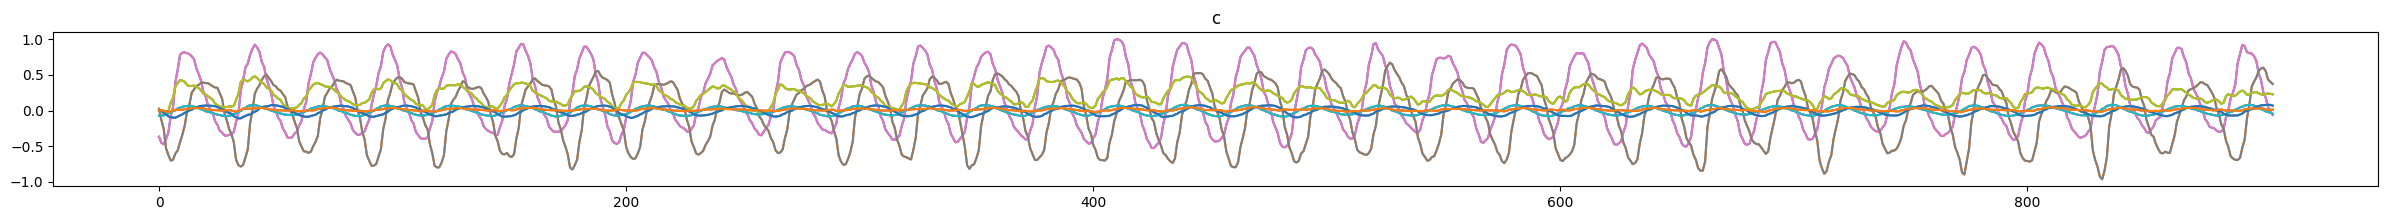

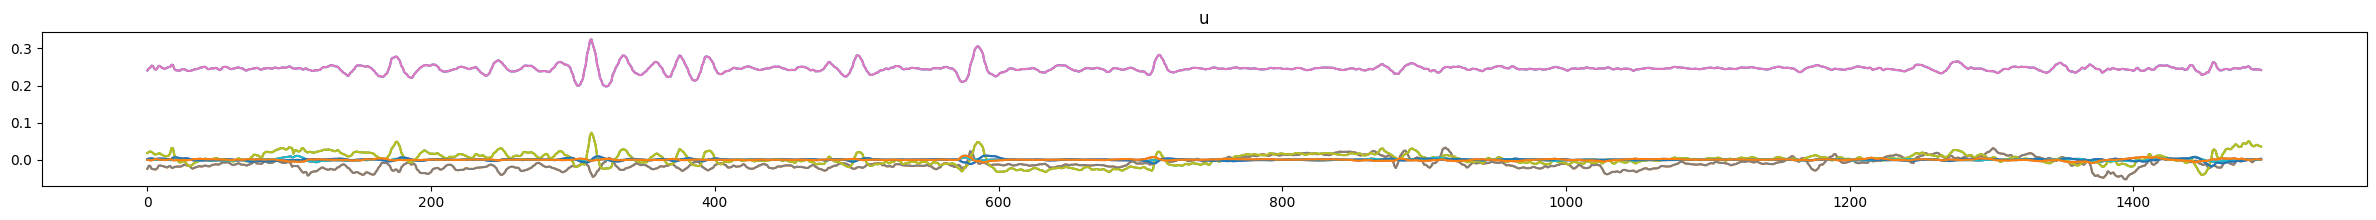

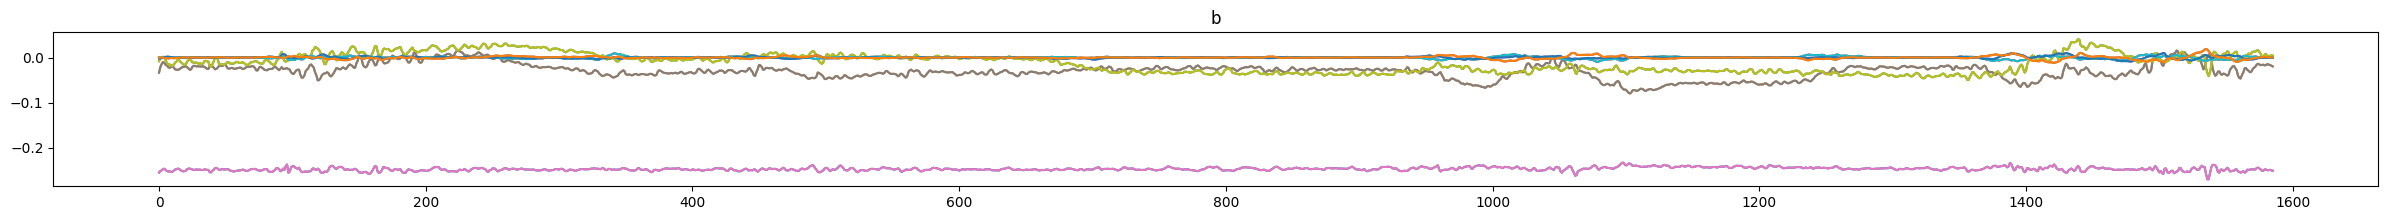

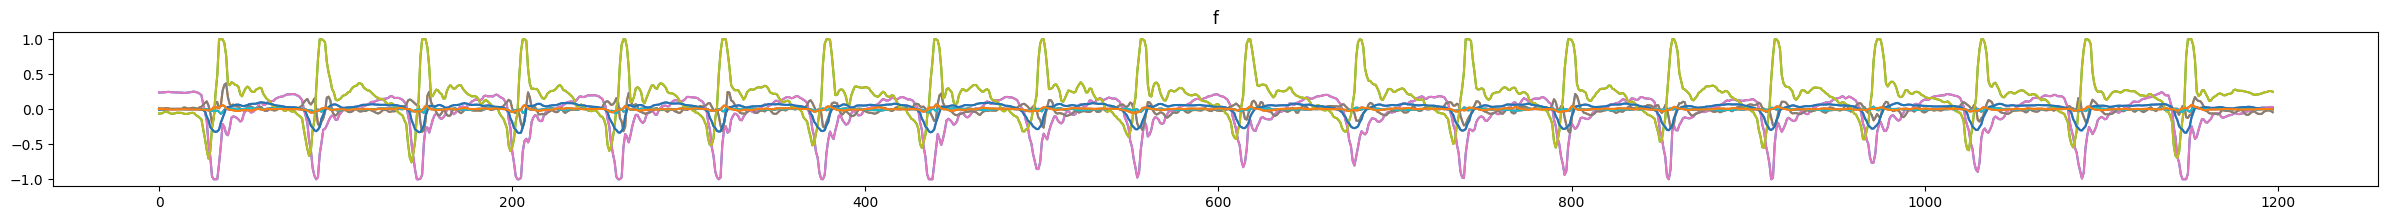

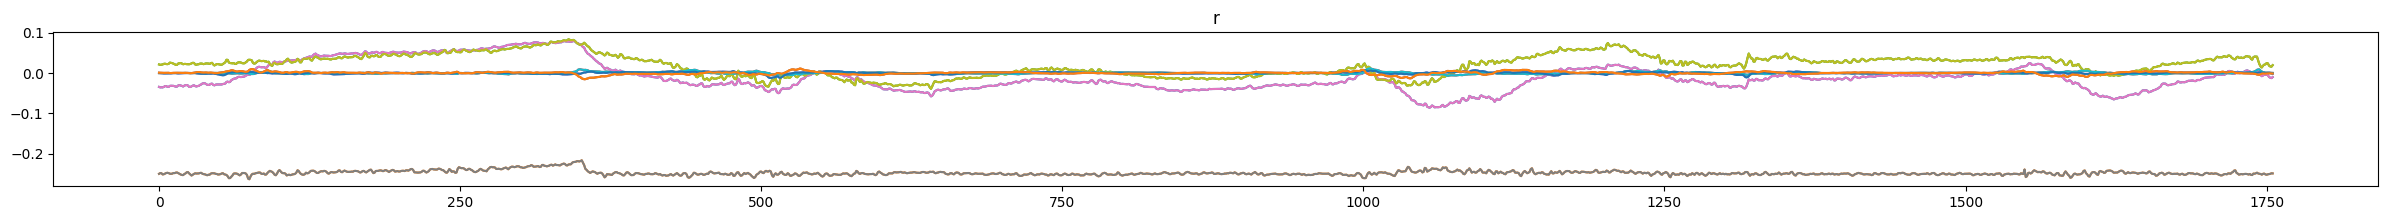

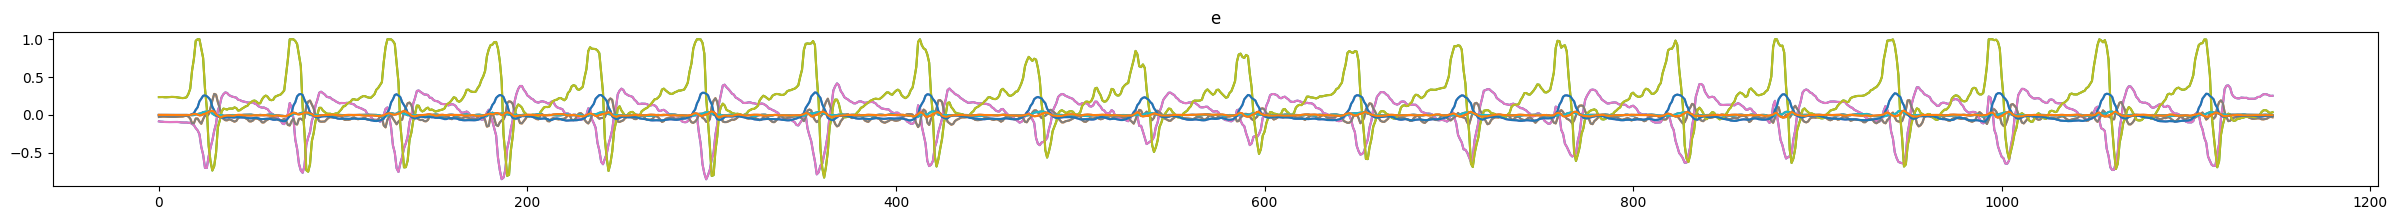

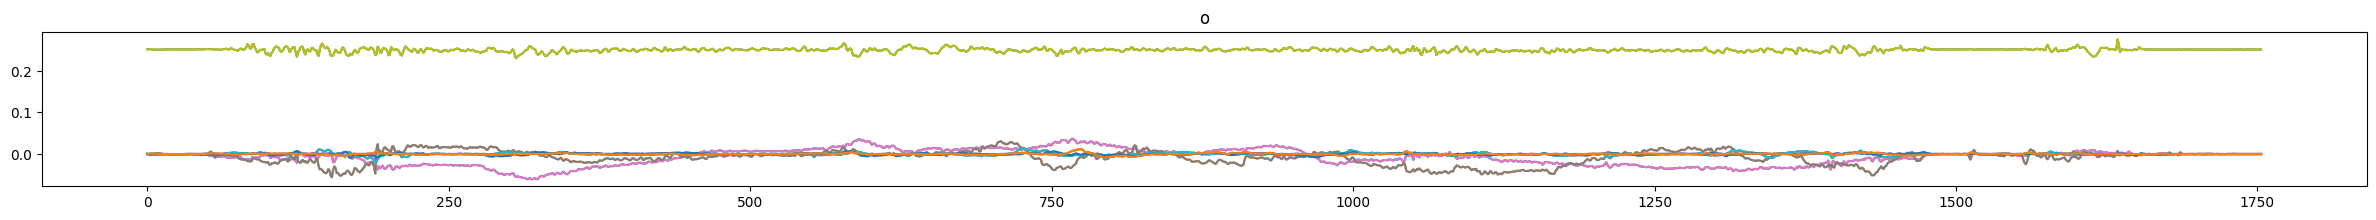

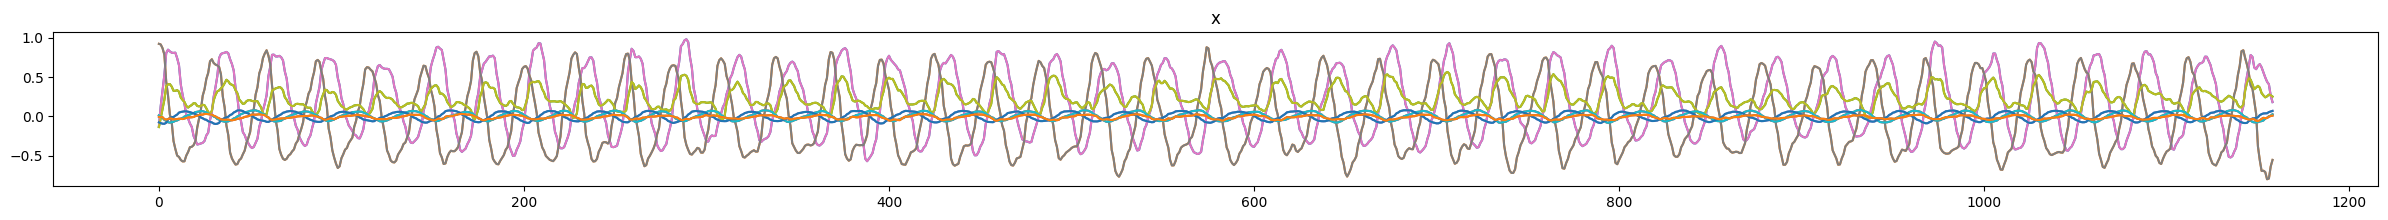

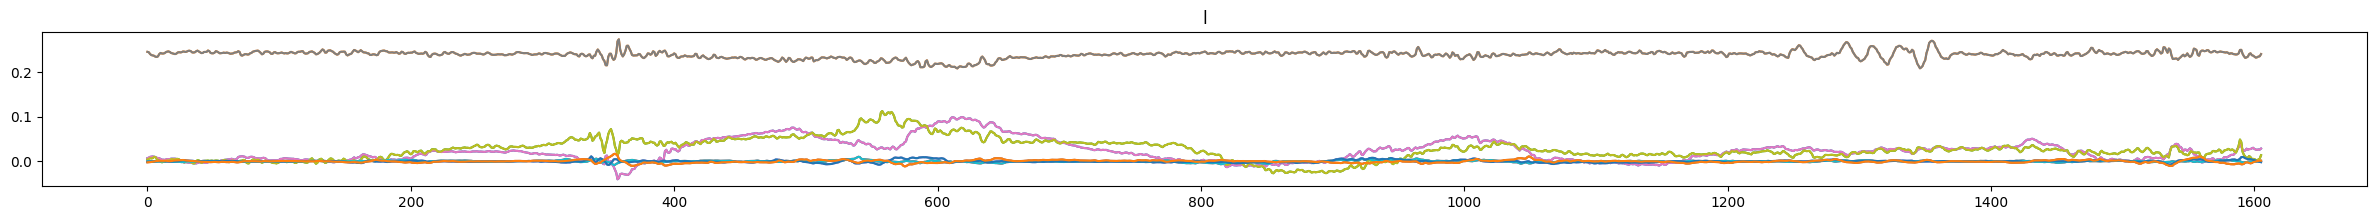

In [4]:
# visualize data from all gestures
for gesture_name, df in data.items():
    plt.figure(figsize=(30, 2))
    plt.title(gesture_name)
    plt.plot(df.values[:, :-1])
    plt.plot(df.values[:, :-1])
    plt.show()




### Training

In [8]:
# create windows of data, window size 50, overlap 49
window_size = 50
X = []
y = []
for gesture_name, df in data.items():
    df_values = df.values[:, :-1]
    label = gesture_name
    for i in range(0, len(df) - window_size, 1):
        X.append(df_values[i:i+window_size].flatten())
        y.append(label)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)


(12154, 300) (12154,)


In [9]:
# split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9723, 300) (2431, 300) (9723,) (2431,)


In [10]:
# train a keras model
import keras
model = keras.Sequential([
    keras.layers.Input(shape=(6 * window_size,)),
    keras.layers.Dense(64, activation='relu'),
    # keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(data.keys()), activation='softmax')
])
print(model.summary())
print(len(data.keys()))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=3e-4), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=[keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,849 (77.54 KB)

 Trainable params: 19,849 (77.54 KB)

 Non-trainable params: 0 (0.00 B)

None
9


Epoch 1/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6766 - loss: 1.6579 - val_accuracy: 0.9034 - val_loss: 0.6159
Epoch 2/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9303 - loss: 0.4823 - val_accuracy: 0.9931 - val_loss: 0.2516
Epoch 3/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9971 - loss: 0.2049 - val_accuracy: 1.0000 - val_loss: 0.1245
Epoch 4/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 1.0000 - loss: 0.1047 - val_accuracy: 1.0000 - val_loss: 0.0670
Epoch 5/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 1.0000 - loss: 0.0566 - val_accuracy: 1.0000 - val_loss: 0.0394
Epoch 6/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 1.0000 - loss: 0.0332 - val_accuracy: 1.0000 - val_loss: 0.0250
Epoch 7/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 1.0000 - loss: 0.0215 - val_accuracy: 1.0000 - val_loss: 0.0170
Epoch 8/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 1.0000 - loss: 0.0145 - va

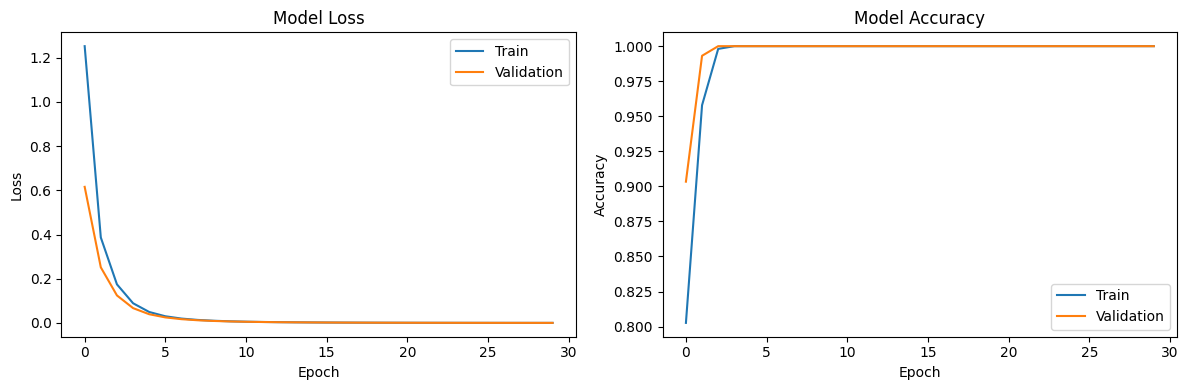

In [11]:
batch_size = 32
epochs = 30

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="./checkpoints/model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=1),
]

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)
score = model.evaluate(X_test, y_test, verbose=0)

# Plot training & validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

### Evaluation

In [12]:
print(f"Test loss: {score[0]:.4f}", f"Test accuracy: {score[1]:.4f}")

Test loss: 0.0002 Test accuracy: 1.0000


In [13]:
# plot losses and accuracy over time
'_'.join(sorted(data.keys()))

'b_c_e_f_l_o_r_u_x'

### Saving

In [ ]:
# save the model
import pickle
import time

# make the model name based on the gesture names
run_timestamp = str(time.time()).replace(".", "-")
model_name = '_'.join(sorted(data.keys())) + "__" + run_timestamp

# make a model directory
model_dir = Path('./models')
model_dir.mkdir(parents=True, exist_ok=True)

with open(model_dir / f'{model_name}.keras', 'wb') as f:
    pickle.dump(model, f)
with open(model_dir / f'label_encoder_{model_name}.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

model_name

In [ ]:
model.predict(X_test[[0]])

In [ ]:
X_test.shape